<a href="https://colab.research.google.com/github/hvr2026/Clustering-Algorithms/blob/main/Clustering%20of%20Timeseries%20Data/Clustering_of_Timeseries_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Required imports for the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [2]:

# Simulated time-series data for clustering analysis
np.random.seed(42)
clusters = {
    'Cluster_1': [np.sin(np.linspace(0, 2 * np.pi, 100)) + np.random.normal(0, 0.1, 100) for _ in range(20)],
    'Cluster_2': [np.cos(np.linspace(0, 2 * np.pi, 100)) + np.random.normal(0, 0.1, 100) for _ in range(20)],
    'Cluster_3': [np.sin(np.linspace(0, 2 * np.pi, 100)) * 0.5 + np.random.normal(0, 0.1, 100) for _ in range(20)],
}


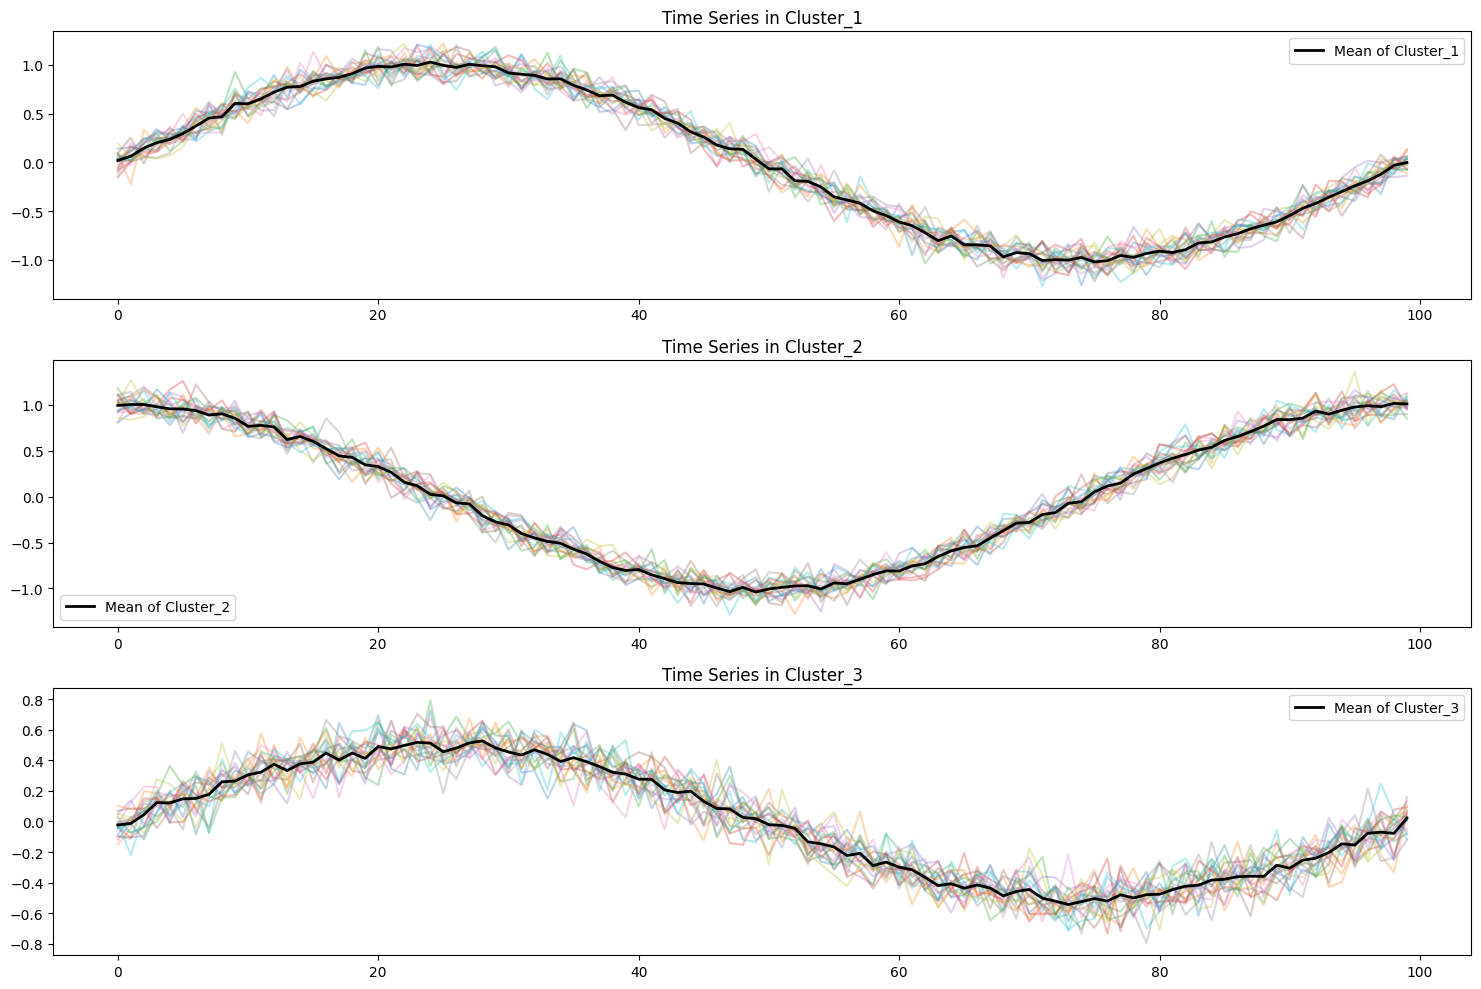

In [3]:

# Visualize the clusters as line plots
plt.figure(figsize=(15, 10))
for i, (key, values) in enumerate(clusters.items()):
    plt.subplot(3, 1, i + 1)
    for series in values:
        plt.plot(series, alpha=0.3)
    plt.plot(np.mean(values, axis=0), label=f"Mean of {key}", color="black", linewidth=2)
    plt.title(f"Time Series in {key}")
    plt.legend()
plt.tight_layout()
plt.show()


In [4]:

# Compute average profiles for each cluster
average_profiles = {key: np.mean(values, axis=0) for key, values in clusters.items()}
pd.DataFrame(average_profiles).head()  # Display first few rows of averages


,Cluster_1,Cluster_2,Cluster_3
0,0.019175,0.994663,-0.022583
1,0.063500,1.004573,-0.012534
2,0.146335,1.004222,0.044631
3,0.202458,0.979901,0.123073
4,0.235913,0.957100,0.121488


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


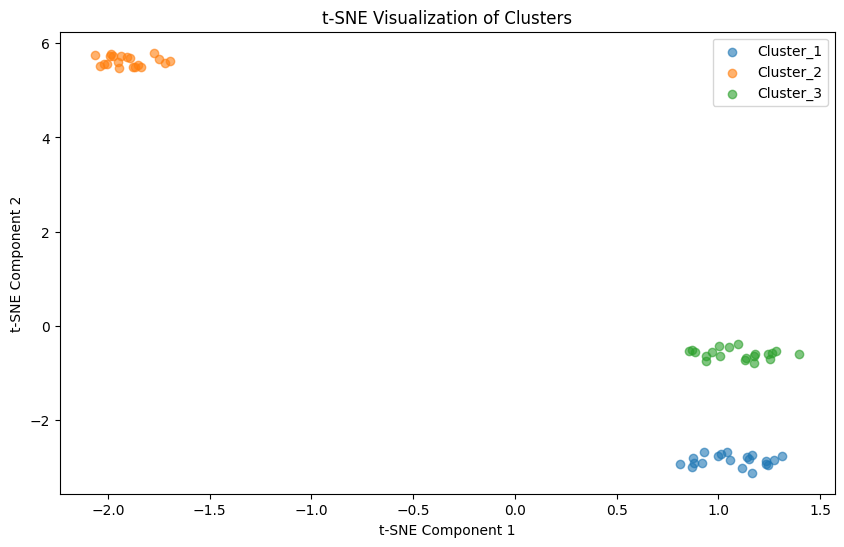

In [6]:

# Prepare flattened data and labels for dimensionality reduction
flattened_data = np.array([value for values in clusters.values() for value in values])
labels = [key for key, values in clusters.items() for _ in range(len(values))]

# t-SNE for visualization
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, n_iter=300, perplexity=30)
tsne_results = tsne.fit_transform(flattened_data)

# t-SNE Scatter Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for cluster in clusters.keys():
    cluster_indices = [i for i, label in enumerate(labels) if label == cluster]
    plt.scatter(tsne_results[cluster_indices, 0], tsne_results[cluster_indices, 1], label=cluster, alpha=0.6)
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()


In [7]:

# Generate cluster-wise statistical summaries
cluster_stats = {
    key: {
        'Mean': np.mean(values),
        'Standard Deviation': np.std(values),
        'Min': np.min(values),
        'Max': np.max(values),
    }
    for key, values in clusters.items()
}

pd.DataFrame(cluster_stats).T


,Mean,Standard Deviation,Min,Max
Cluster_1,0.004508,0.710746,-1.272841,1.218920
Cluster_2,0.009356,0.719449,-1.286552,1.360572
Cluster_3,-0.004801,0.365885,-0.795122,0.792999


In [12]:
# Prepare flattened data and labels for dimensionality reduction
flattened_data = np.array([value for values in clusters.values() for value in values])
labels = [key for key, values in clusters.items() for _ in range(len(values))]

# PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(flattened_data)


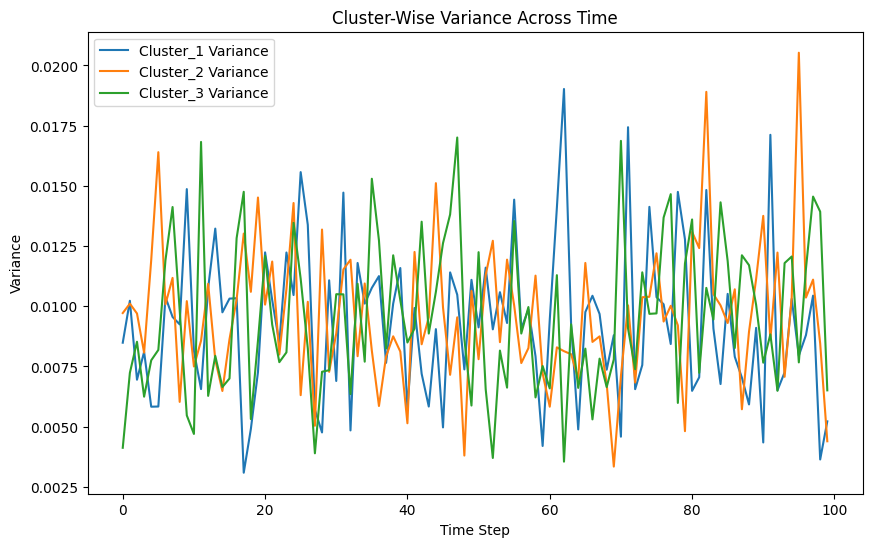

In [13]:
# Cluster-Wise Variance Plot
plt.figure(figsize=(10, 6))
for key, values in clusters.items():
    variance = np.var(values, axis=0)
    plt.plot(variance, label=f"{key} Variance")
plt.title("Cluster-Wise Variance Across Time")
plt.xlabel("Time Step")
plt.ylabel("Variance")
plt.legend()
plt.show()


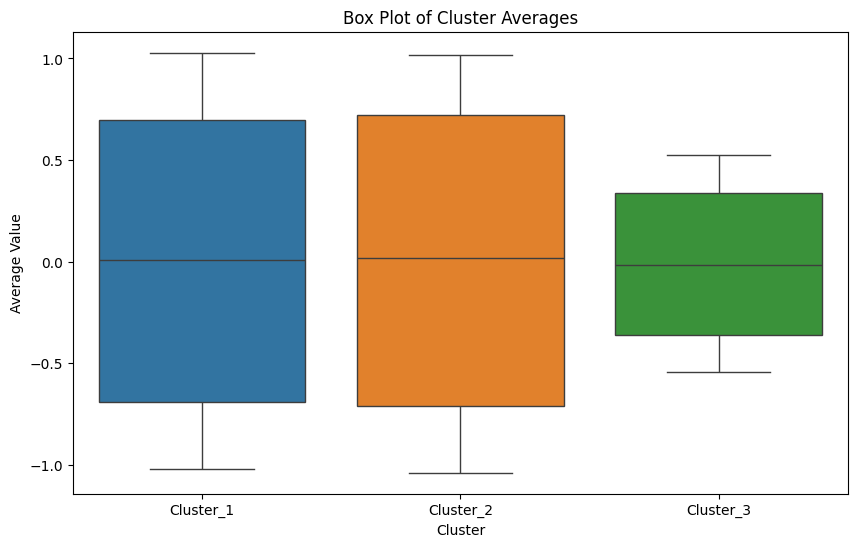

In [14]:
# Box Plot for Cluster Averages
import seaborn as sns
average_df = pd.DataFrame(average_profiles)
plt.figure(figsize=(10, 6))
sns.boxplot(data=average_df)
plt.title("Box Plot of Cluster Averages")
plt.xlabel("Cluster")
plt.ylabel("Average Value")
plt.show()


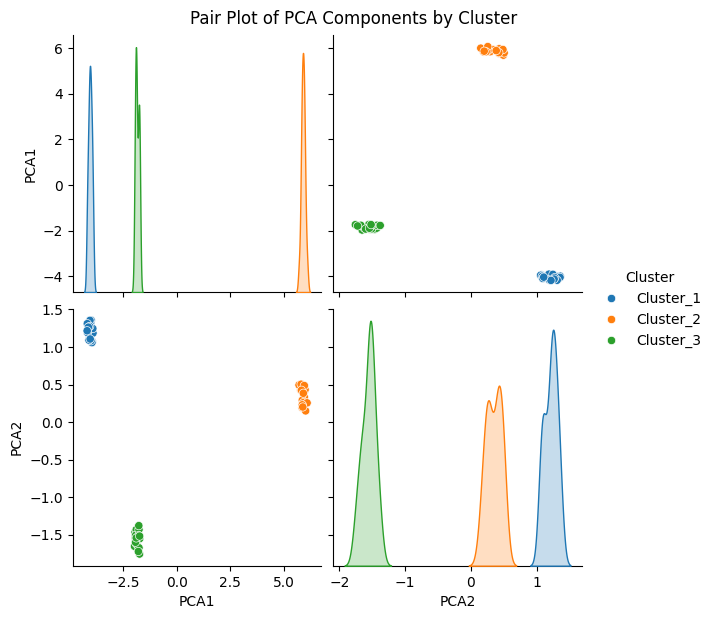

In [15]:
# Pair Plot for PCA Components
pca_df = pd.DataFrame(pca_results, columns=["PCA1", "PCA2"])
pca_df["Cluster"] = labels

sns.pairplot(pca_df, hue="Cluster", diag_kind="kde", height=3)
plt.suptitle("Pair Plot of PCA Components by Cluster", y=1.02)
plt.show()


In [8]:

# Calculate Silhouette Score for Clustering
cluster_labels = [label for key in clusters for label in [key] * len(clusters[key])]
cluster_data = np.vstack([values for values in clusters.values()])

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(cluster_data)
silhouette_avg = silhouette_score(cluster_data, labels)
print(f"Silhouette Score for KMeans Clustering: {silhouette_avg}")


Silhouette Score for KMeans Clustering: 0.6939089424146359


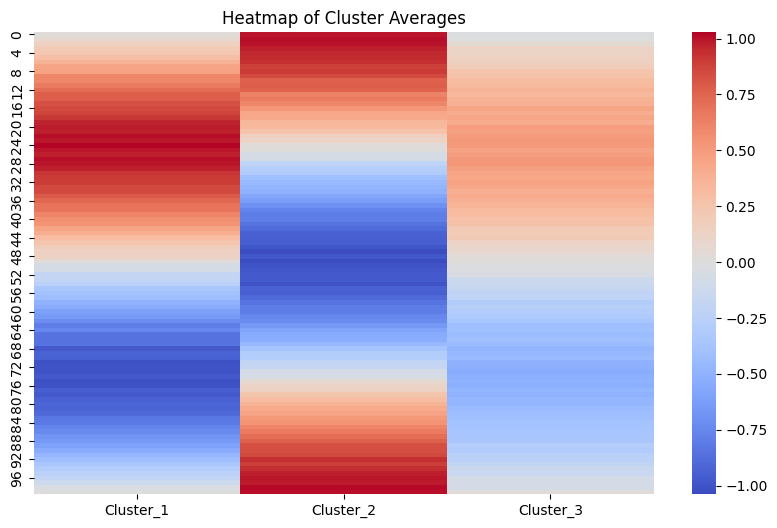

In [9]:

# Heatmap of Cluster Averages
import seaborn as sns

average_df = pd.DataFrame(average_profiles)
plt.figure(figsize=(10, 6))
sns.heatmap(average_df, annot=False, cmap="coolwarm", cbar=True)
plt.title("Heatmap of Cluster Averages")
plt.show()
